In [2]:
import tensorflow as tf
print(tf.__version__)
from matplotlib import pyplot as plt
import random

2.1.0


In [8]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2

features = tf.random.normal((num_examples, num_inputs), stddev = 1)
print(features)
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += tf.random.normal(labels.shape, stddev = 0.01)
print(labels.shape)


tf.Tensor(
[[-0.879945    0.737163  ]
 [ 1.3099631   0.70773405]
 [ 0.5353903   0.40938565]
 ...
 [ 0.02447701 -0.94816357]
 [ 0.35857093 -1.2388082 ]
 [-1.0806487  -0.67208314]], shape=(1000, 2), dtype=float32)
(1000,)


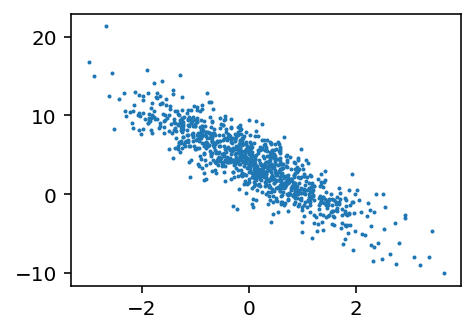

In [12]:
def set_figsize(figsize = (3.5, 2.5)):
    plt.rcParams['figure.figsize'] = figsize

set_figsize()
plt.scatter(features[:, 1], labels, 1)

In [14]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = indices[i: min(i+batch_size, num_examples)]
        yield tf.gather(features, axis = 0, indices = j), tf.gather(labels, axis = 0, indices = j)

batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break


tf.Tensor(
[[-0.17577054  0.8890791 ]
 [ 0.93294626 -0.7168154 ]
 [ 1.1861016   1.6855209 ]
 [-0.33250347 -0.25518   ]
 [ 0.21046911 -0.18178108]
 [ 0.53424364 -1.0099803 ]
 [-2.258802    1.7652537 ]
 [-0.47748092  0.17903598]
 [-0.14788938  0.00628775]
 [ 0.07264648  0.26020426]], shape=(10, 2), dtype=float32) tf.Tensor(
[ 0.81398237  8.495558    0.8384965   4.400837    5.235945    8.693923
 -6.338501    2.6222706   3.8908844   3.4724538 ], shape=(10,), dtype=float32)


In [19]:
w = tf.Variable(tf.random.normal((num_inputs, 1), stddev=0.01))
b = tf.Variable(tf.zeros((1,)))

def linreg(X, w, b):
    return tf.matmul(X, w) + b

def squared_loss(y_hat, y):
    return (y_hat - tf.reshape(y, y_hat.shape)) ** 2 /2

def sgd(params, lr, batch_size, grads):
    """Mini-batch stochastic gradient descent."""
    for i, param in enumerate(params):
        param.assign_sub(lr * grads[i] / batch_size)



In [23]:
lr = 0.01
num_epochs = 10
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        with tf.GradientTape() as t:
            t.watch([w,b])
            l = loss(net(X, w, b), y)
        grads = t.gradient(l, [w, b])
        sgd([w, b], lr, batch_size, grads)
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, tf.reduce_mean(train_l)))

print(true_w, true_b)
print(w,b)


epoch 1, loss 0.000050


epoch 2, loss 0.000050


epoch 3, loss 0.000050


epoch 4, loss 0.000050


epoch 5, loss 0.000050


epoch 6, loss 0.000050


epoch 7, loss 0.000050


epoch 8, loss 0.000050


epoch 9, loss 0.000050


epoch 10, loss 0.000050
[2, -3.4] 4.2
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[ 1.9998356],
       [-3.4002533]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([4.2002134], dtype=float32)>
